# Exploratory Data Analysis: Acetylcholinesterase CDD project
In this section, we will be performing Descriptors Calculations and exploratory data analysis of our dataset.

#### Import libraries and get the data

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df = pd.read_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase-03-bioactivity-data-labelled.csv',delimiter=',')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5794,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5795,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5796,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5797,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


In [5]:
df_drop_smile = df.drop(columns='canonical_smiles')  #drop canonical to clean it from strange values

In [6]:
smiles = [] #to save our clean canonical values

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')  #separe each entry in each '.' that it is founds
    cpd_longest = max(cpd, key=len) #select the longest molecule
    smiles.append(cpd_longest) #save 

smiles = pd.Series(smiles, name= 'canonical_smiles') #change object to dataframe

In [7]:
df_clean_smiles = pd.concat([df_drop_smile, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5794,CHEMBL4859103,2.57,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...
5795,CHEMBL4863615,2.39,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...
5796,CHEMBL4854913,0.41,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
5797,CHEMBL4848527,0.63,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...


## Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following considerations:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

#### Calculate descriptors

In [8]:
one_canol= df_clean_smiles['canonical_smiles'][0]
moldata = []
mol = Chem.MolFromSmiles(one_canol)
moldata.append(mol)
moldata

In [9]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    
    baseData = np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)             #average molecular weigth
        desc_MolLogP = Descriptors.MolLogP(mol)         #to check lipophilicity
        desc_NumHDonors = Lipinski.NumHDonors(mol)      #to check number of H bond donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #to check number of H bond acceptors

        row = np.array([desc_MolWt, 
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData,row])
        i=i+1
    
    columnsNames = ['MW','LogP','NumHDonors','NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnsNames)

    return descriptors

In [10]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5794,562.154,7.8680,4.0,5.0
5795,506.094,7.3886,3.0,4.0
5796,523.121,5.9852,2.0,4.0
5797,547.143,7.0315,3.0,4.0


## Combine DataFrames
1. our lipinky descriptors
2. Initial dataset

In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5794,562.154,7.8680,4.0,5.0
5795,506.094,7.3886,3.0,4.0
5796,523.121,5.9852,2.0,4.0
5797,547.143,7.0315,3.0,4.0


### Combine both dataset

In [12]:
df_combined = pd.concat([df, df_lipinski], axis = 1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5794,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active,562.154,7.8680,4.0,5.0
5795,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active,506.094,7.3886,3.0,4.0
5796,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active,523.121,5.9852,2.0,4.0
5797,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active,547.143,7.0315,3.0,4.0


### cleaning NAN values again: in case we still have NAN values

In [14]:
df2 = df_combined[df_combined.standard_value.notna()] #because there is NAN values
df2

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5794,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active,562.154,7.8680,4.0,5.0
5795,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active,506.094,7.3886,3.0,4.0
5796,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active,523.121,5.9852,2.0,4.0
5797,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active,547.143,7.0315,3.0,4.0


## Convert IC50 to pIC50
In order to have more uniform data distributed we are going to convert IC50 to the negative logarithmic scale which is essentially **-log10(IC50)**.
The following function pIC50 will accept a DataFrame as input and will:
* Take the IC50 values from standard value columns and transform it from nM to M by multiplying the value to 10^-9
* Take the molar value and apply -log10
* Delete the standard _value column and create a new pIC50 column

In [15]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) #convert Nm to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',1)
    return x


NOTE: values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [31]:
df_combined.drop(df_combined[(df_combined.standard_value <= 0)].index, inplace=True) #eliminate values with zero or negative

In [35]:
df_combined.shape #check the dimensions

(5798, 8)

In [33]:
df_combined.standard_value.describe() #let us check how is the distribution

count    5.798000e+03
mean     2.600090e+12
std      1.070517e+14
min      5.000000e-06
25%      1.455000e+02
50%      2.375000e+03
75%      1.698244e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [36]:
-np.log10( (10**-9) * 100000000 ) #values equal or greater will be fixed

1.0

#### Normalization of standard value column

In [37]:
#so lets normalize the values greater than 100,000,000
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        elif i == 0:
            i == 1

        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',1)
    
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [42]:
df_norm = norm_value(df_combined) #used defined function to normalized

/home/alejandrodf1/anaconda3/envs/computational_drug_discovery_project/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [44]:
df_combined.standard_value_norm.min()

5e-06

In [45]:
df_final = pIC50(df_norm) #now we can transform to pIC50

/home/alejandrodf1/anaconda3/envs/computational_drug_discovery_project/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [46]:
df_final.pIC50.describe()

count    5798.000000
mean        5.822268
std         1.583186
min         1.000000
25%         4.770000
50%         5.624337
75%         6.837145
max        14.301030
Name: pIC50, dtype: float64

In [51]:
df_final.to_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase-04-bioactivity-data-pIC50.csv') #send ir to a csv

### Removing the 'Intermediate' Bioactivity class
In this section we will removing the intermediate class from our data set.

In [50]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5794,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5795,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5796,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5797,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [52]:
df_final.to_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase-05-bioactivity-data-2classes-pIC50.csv') #send ir to a csv

## Chemical Space Analysis via Lipinsky Descriptiors

In [53]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

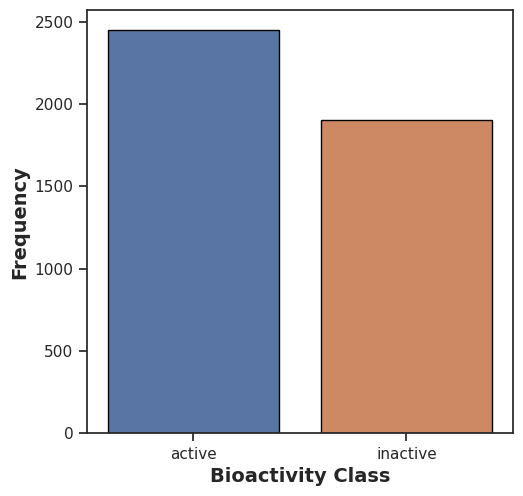

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data = df_2class, edgecolor = 'black')

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP
It can be seen that the two bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

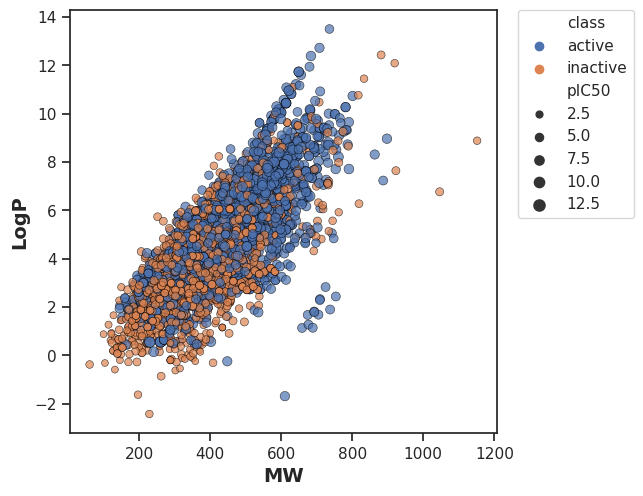

In [55]:
plt.figure(figsize = (5.5, 5.5))

sns.scatterplot(x = 'MW', y = 'LogP', data=df_2class, hue='class', size='pIC50', edgecolor = 'black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize =14, fontweight='bold')
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0)
plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_MW_vs_LogP.pdf')

## Box plots
pIC50 value

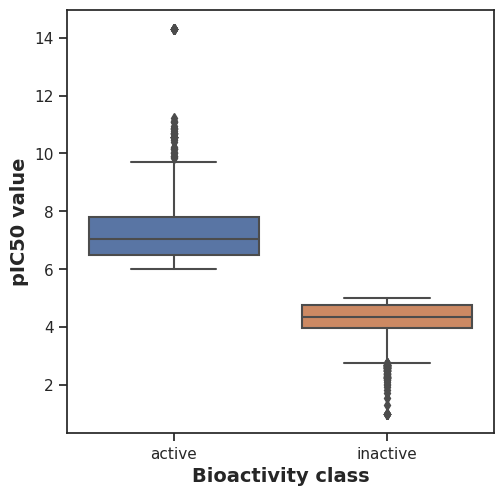

In [56]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='class', y='pIC50', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_ic50.pdf')

### Statistical Analysis: Mann-Whitney U test

In [57]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4655549.0,0.0,0.05,Different distribution (reject H0)


### Boxplot of: MW

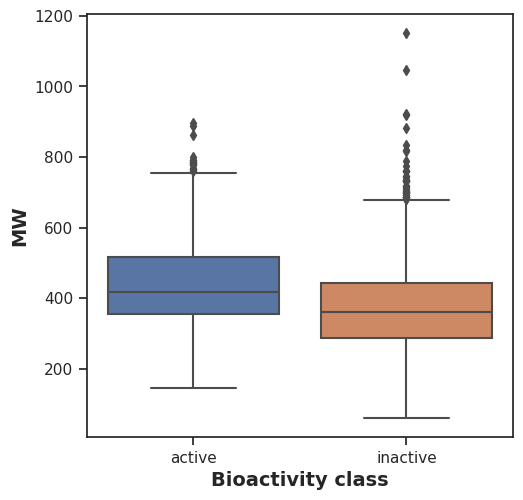

In [60]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='class', y='MW', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_MW.pdf')

In [61]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3031540.5,8.978726e-66,0.05,Different distribution (reject H0)


### Boxplot and mann-whitneey LogP

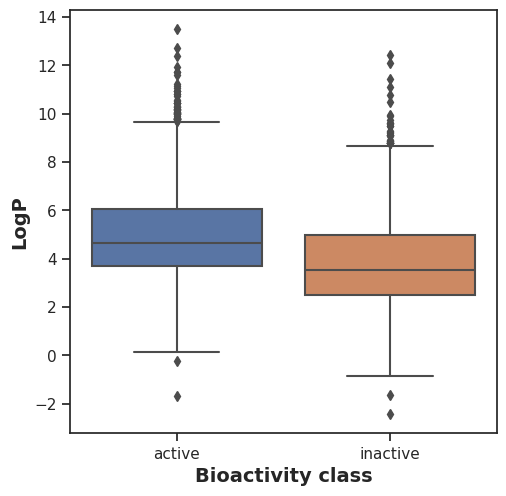

In [62]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='class', y='LogP', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_LogP.pdf')

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3114384.5,1.052421e-81,0.05,Different distribution (reject H0)


### Boxplot: NumHDonors

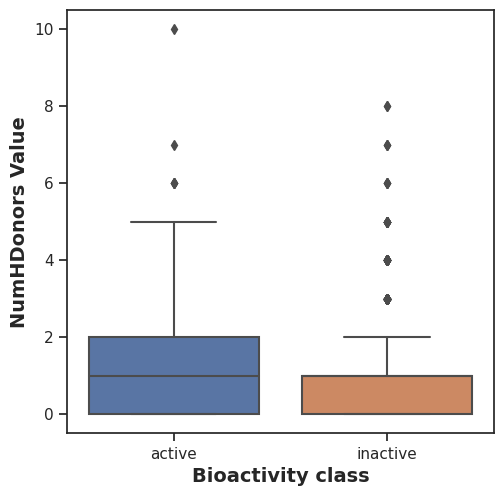

In [64]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='class', y='NumHDonors', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors Value', fontsize=14, fontweight='bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_NumHDonors.pdf')

In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2667762.0,4.156180e-18,0.05,Different distribution (reject H0)


### Boxplot and MannWhitney: NumHAcceptos

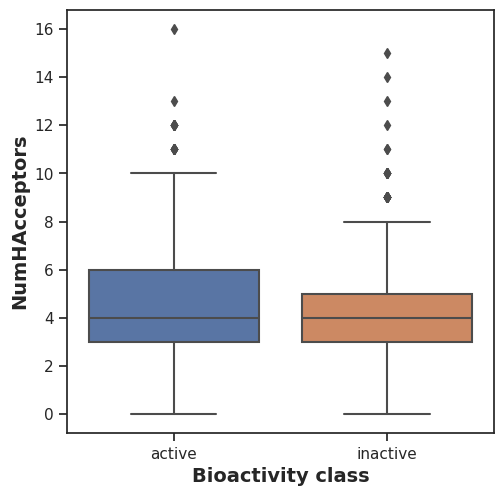

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/interim/plot_NumHAcceptors.pdf')

In [67]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2540099.0,1.549366e-07,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results

#### **Box Plots :**
Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.
#### **Lipinsky's Descriptors :**
All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.

